<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="house.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Property Price Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement

A key challenge for property sellers is to determine the sale price of the property. The ability to predict the exact property value is beneficial for property investors as well as for buyers to plan their finances according to the price trend. The property prices depend on the number of features like the property area, basement square footage, year built, number of bedrooms, and so on. Regression analysis can be useful in predicting the price of the house.

<a id='import_lib'></a>
# 1. Import Libraries

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Import the required libraries and functions</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:

import numpy as np
import pandas as pd 


from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


import statsmodels
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing


from scipy.stats import shapiro
from scipy import stats


import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns

In [2]:

from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [15,8]

<a id='set_options'></a>
# 2. Set Options

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
1. Display complete data frames<br>
2. To avoid the exponential number<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:

pd.options.display.max_columns = None


pd.options.display.max_rows = 100
np.set_printoptions(suppress=True)

<a id='Read_Data'></a>
# 3. Read Data

In [6]:

df_property = pd.read_csv(r'C:\Users\DAKSHIN\Desktop\PGP Analytics\Linear Regression\Dataset\HousePrices.csv')


df_property.head(10)

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No

#### Dimensions of the data

In [5]:

df_property.shape

(2073, 81)

In [17]:

df_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [7]:
df_property.Dwell_Type.value_counts()

20      722
60      431
50      205
30      133
120     114
90       91
80       78
160      78
70       77
190      42
85       34
75       19
180      14
150      13
45       13
40        7
303       1
7080      1
Name: Dwell_Type, dtype: int64

In [20]:
df_property.Alley.value_counts()

Grvl    72
Pave    57
Name: Alley, dtype: int64

In [23]:
df_property[df_property.Dwell_Type > 300]

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
1538,1539,303,RM,120.0,9596,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,RRAe,Norm,1Fam,2Story,4,9,1979,2007,Gable,CompShg,VinylSd,VinylSd,Stone,640.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1566,1566,GasA,Ex,Y,SBrkr,1600,0,0,1600,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,RFn,3,890,TA,TA,Y,0,56,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,256300
1751,1752,7080,RL,65.0,9549,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,CollgCr,Norm,Norm,1Fam,2Story,9,8,2005,2017,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,864,864,GasA,Ex,Y,SBrkr,864,864,0,1728,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2005.0,RFn,2,572,TA,TA,Y,187,56,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,190000


In [22]:
df_property.isnull().sum()

Id                        0
Dwell_Type                0
Zone_Class                0
LotFrontage             320
LotArea                   0
Road_Type                 0
Alley                  1944
Property_Shape            0
LandContour               0
Utilities                 0
LotConfig                 0
LandSlope                 0
Neighborhood              0
Condition1                0
Condition2                0
Dwelling_Type             0
HouseStyle                0
OverallQual               0
OverallCond               0
YearBuilt                 0
YearRemodAdd              0
RoofStyle                 0
RoofMatl                  0
Exterior1st               0
Exterior2nd               0
MasVnrType               14
MasVnrArea               14
ExterQual                 0
ExterCond                 0
Foundation                0
BsmtQual                 59
BsmtCond                 59
BsmtExposure             61
BsmtFinType1             59
BsmtFinSF1                0
BsmtFinType2        

<a id='data_preparation'></a>
# 4. Data Analysis and Preparation

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                         Performing the following tasks:<br>
                        1. Check data types. Ensure your data types are correct.<br>
                        2. Change the data types as per requirement  <br>
                        3. Summary statistics<br>
                        4. Distribution of variables<br>
                        5. Correlation<br>
                        6. Outlier Detection <br>
                        7. Missing values <br><br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Understanding'></a>
## 4.1 Understand the Dataset

**1. Check for the data type**

In [5]:

df_property.dtypes

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
Road_Type               object
Alley                   object
Property_Shape          object
LandContour             object
Utilities               object
LotConfig               object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
Dwelling_Type           object
HouseStyle              object
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual               object
ExterCond               object
Foundation              object
BsmtQual                object
BsmtCond                object
BsmtExpo

#### convert  'Dwell_Type ', 'OverallQual' and 'OverallCond'  to categorical data type

In [8]:
df_property.head(20)

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No

In [25]:
df_property['Dwell_Type'] = df_property['Dwell_Type'].astype('O')
df_property['OverallQual'] = df_property['OverallQual'].astype('O')
df_property['OverallCond'] = df_property['OverallCond'].astype('O')

####  remove the Id column as this will not be necessary for our analysis

In [26]:
df_property.drop(['Id'], axis=1, inplace=True)

In [27]:
df_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 80 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dwell_Type           2073 non-null   object 
 1   Zone_Class           2073 non-null   object 
 2   LotFrontage          1753 non-null   float64
 3   LotArea              2073 non-null   int64  
 4   Road_Type            2073 non-null   object 
 5   Alley                129 non-null    object 
 6   Property_Shape       2073 non-null   object 
 7   LandContour          2073 non-null   object 
 8   Utilities            2073 non-null   object 
 9   LotConfig            2073 non-null   object 
 10  LandSlope            2073 non-null   object 
 11  Neighborhood         2073 non-null   object 
 12  Condition1           2073 non-null   object 
 13  Condition2           2073 non-null   object 
 14  Dwelling_Type        2073 non-null   object 
 15  HouseStyle           2073 non-null   o

<a id='Summary_Statistics'></a>
### 4.1.2 Summary Statistics



**1. For getting the statistical summary of numerical variables we use the describe()**

In [1]:
# by default the describe function returns the summary of numerical variables
df_property.describe()

NameError: name 'df_property' is not defined

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b>The above output displays the summary statistics of all the numeric variables like mean, median, standard deviation, minimum, and the maximum values, the first and third quantiles.<br><br> 
    We can see that the LotFrontage ranges from 21 feet to 313 feet, with mean 70 feet. 
    We can see that the minimum pool area is 0 sq.ft. and this means that not all houses have pools and yet have been considered to calculate the mean pool area. Also the count for LotFrontage is less than the total number of observations which indicates the presence of missing values.
    </b>     </font>
            </div>
        </td>
    </tr>
</table>

**2. For getting the statistical summary of categorical features we use the describe(include = object)**

In [9]:

df_property.describe(include = object)

,Dwell_Type,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2073,2073,2073,129,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2059,2073,2073,2073,2014,2014,2012,2014,2013,2073,2073,2073,2072,2073,2073,1085,1960,1960,1960,1960,2073,8,404,80,2073,2073
unique,18,5,2,2,4,4,2,5,3,25,9,8,5,8,10,9,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,722,1611,2063,72,1300,1854,2070,1481,1958,317,1794,2054,1719,1036,508,943,1606,2036,750,729,1233,1272,1815,928,904,1851,1349,604,1770,2025,1045,1935,1901,1043,1937,530,1252,857,1870,1885,1913,4,233,74,1797,1695


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The summary statistics for categorical variables contains information about the total number of observations, number of unique classes, the most occurring class, and its frequency.:<br><br> 
                        Lets understand the outputs of the above table using variable 'Property_Shape' <br> 
                        count: Number of observations = 2073 <br> 
                        unique: Number of unique classes in the column = 4 classes<br>  
                        top: The most occurring class = Reg<br>
                        frequency: Frequency of the most repeated class; out of 2073 observations Reg has a frequency of 925 <br> It is visible that some of the variables have count less than total number of observations which indicates the presence of missing values.</b>  
                </font>
            </div>
        </td>
    </tr>
</table>

As, the variable `PoolQC` has only 8 non-zero values out of 2073 observations. And also the variable `PoolArea` contains the area of these 8 pools, we will remove the variables `PoolQC` and `PoolArea`.

In [29]:

df_property = df_property.drop(['PoolQC', 'PoolArea'], axis= 1)


df_property.shape

(2073, 78)

<a id='distribution_variables'></a>
### 4.1.3 Distribution of Variables

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Check the distribution of all the variables.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Distribution of numeric variables**

We plot the histogram to check the distribution of the variables.

In [11]:

df_numeric_features = df_property.select_dtypes(include=np.number)

df_numeric_features.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

In [30]:
df_numeric_features.shape

(2073, 33)

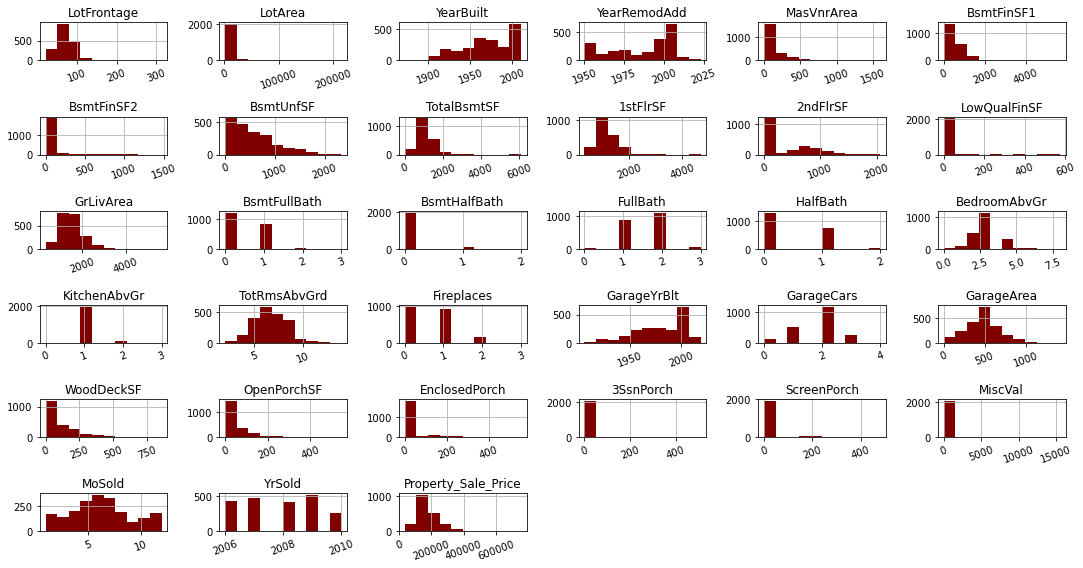

In [35]:

df_numeric_features.hist(xrot = 20, color = "maroon")


plt.tight_layout()


plt.show()  

#### Visualize the target variable

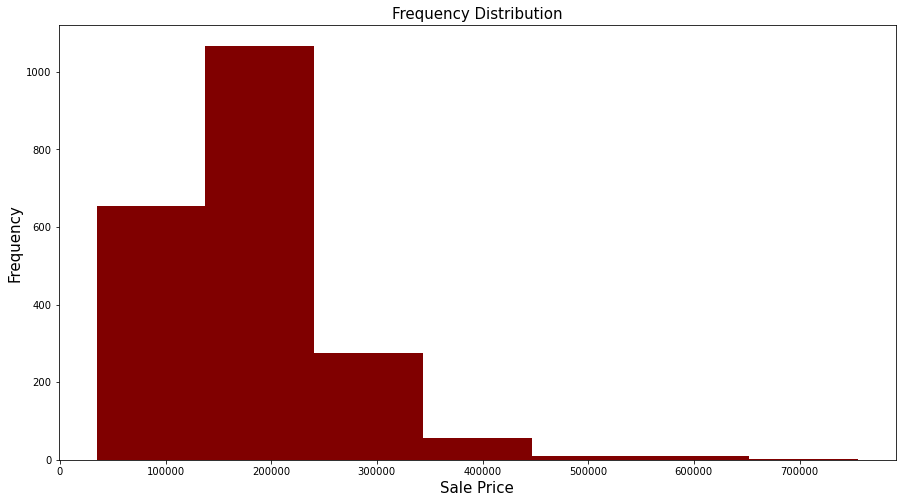

In [38]:

plt.xlabel("Sale Price", fontsize=15)


plt.ylabel("Frequency", fontsize=15)


plt.title("Frequency Distribution", fontsize=15)


plt.hist(df_property["Property_Sale_Price"], color = 'maroon',bins=7)
plt.show()

<AxesSubplot:xlabel='Property_Sale_Price', ylabel='Density'>

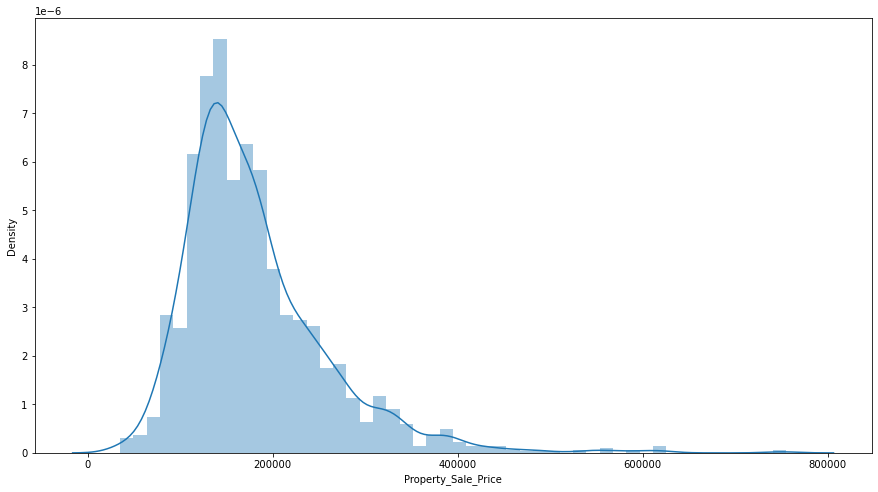

In [40]:
import seaborn as sns
sns.distplot(df_property["Property_Sale_Price"])

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The above plot shows that the target variable 'Property_Sale_Price' is right skewed. 
                    </b>   
                </font>
            </div>
        </td>
    </tr>
</table>



**2. Distribution of categorical variables**

For the categoric variables, we plot the countplot

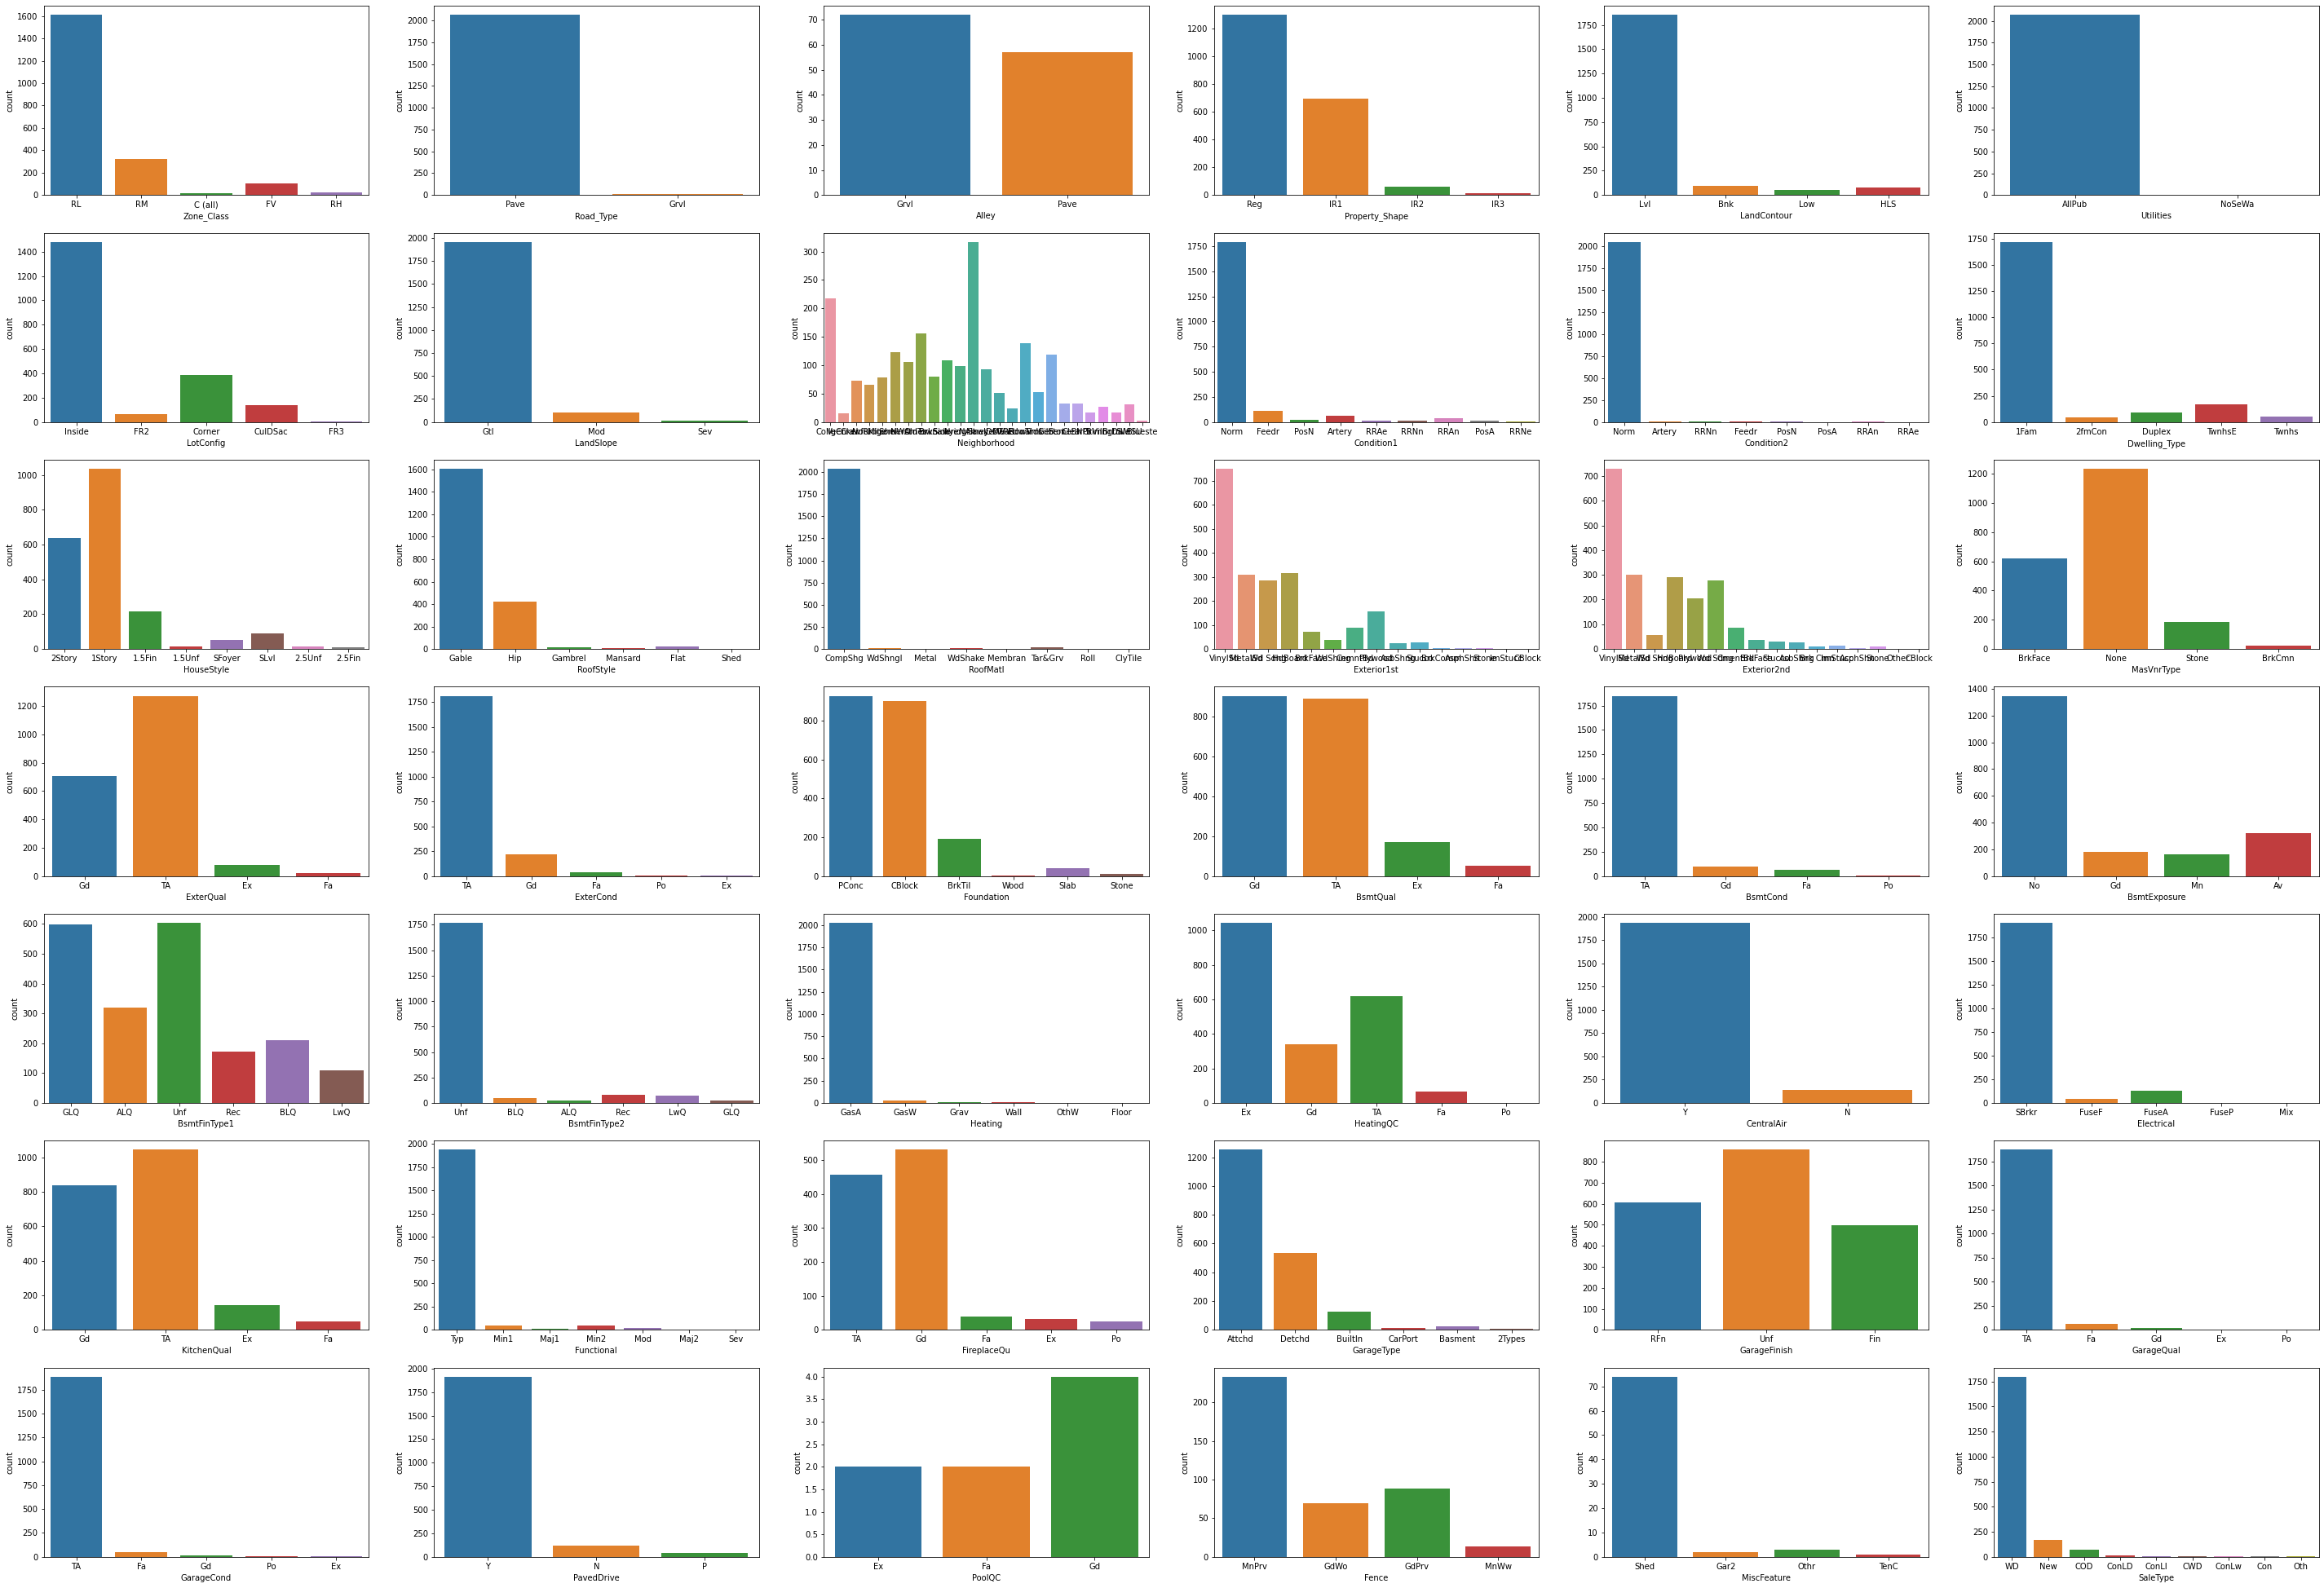

In [9]:

from pandas.api.types import is_string_dtype


categorical=[]

for column in df_property:


    if is_string_dtype(df_property[column]):
        
     
        categorical.append(column)


fig, ax = plt.subplots(nrows=7, ncols=6, figsize = (50, 35))


for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df_property[variable], ax = subplot)
    

plt.show()

In [43]:
categorical

['Dwell_Type',
 'Zone_Class',
 'Road_Type',
 'Alley',
 'Property_Shape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'Dwelling_Type',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

#### Boxplot of OverallQuality and Property_Sale_Price

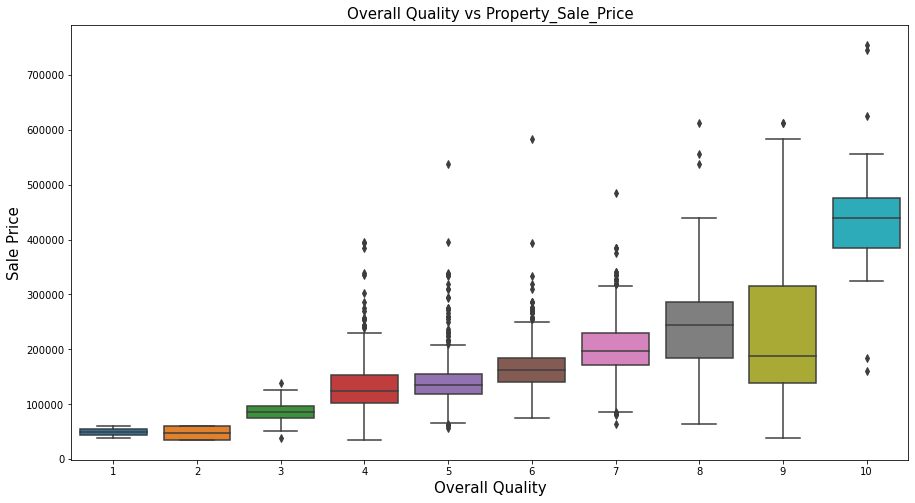

In [16]:

sns.boxplot(y="Property_Sale_Price", x="OverallQual", data= df_property)


plt.title("Overall Quality vs Property_Sale_Price", fontsize=15)

plt.xlabel("Overall Quality", fontsize=15)

plt.ylabel("Sale Price", fontsize=15)

plt.show()

#### Boxplot of Overall Condition and Property_Sale_Price

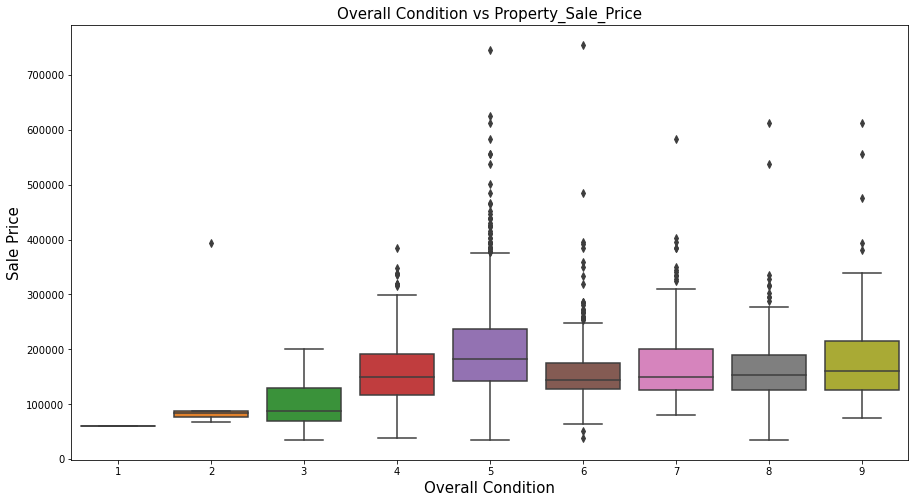

In [17]:
sns.boxplot(y="Property_Sale_Price", x="OverallCond", data= df_property)

plt.title("Overall Condition vs Property_Sale_Price", fontsize=15)

plt.xlabel("Overall Condition", fontsize=15)

plt.ylabel("Sale Price", fontsize=15)

plt.show()

#### Draw the pairplot of the numeric variables

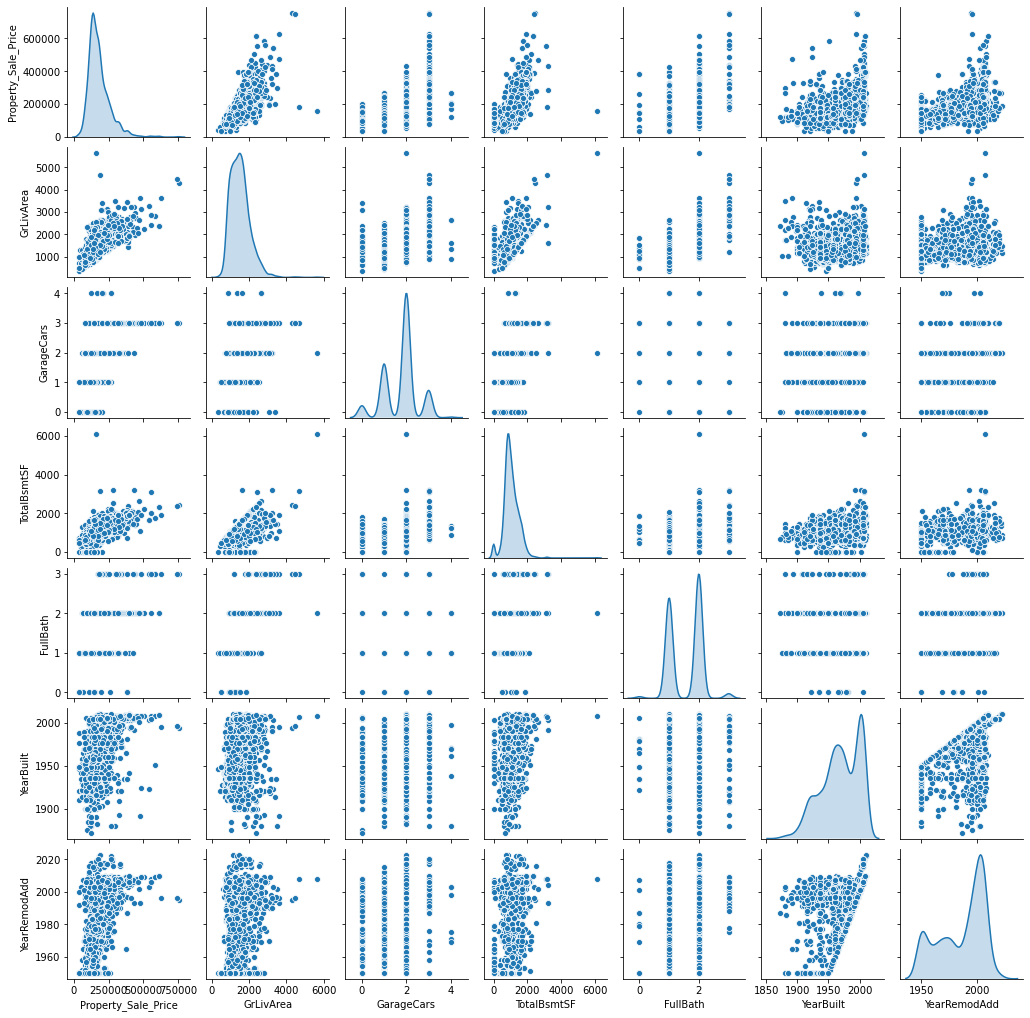

In [18]:

columns= ["Property_Sale_Price", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt", "YearRemodAdd"]

sns.pairplot(df_property[columns], size=2, kind= "scatter", diag_kind="kde")

plt.show()

<a id='outlier'></a>
### 4.1.4 Outliers Discovery

In [44]:
IQR = df_property.Property_Sale_Price.quantile(.75) - df_property.Property_Sale_Price.quantile(.25)
LL = df_property.Property_Sale_Price.quantile(.25) - 1.5 * IQR
UL = df_property.Property_Sale_Price.quantile(.75) + 1.5 * IQR
print(IQR, LL, UL)

84000.0 4000.0 340000.0


In [49]:
sum(df_property.Property_Sale_Price >= 500000)

14

In [48]:
df_property.shape

(2073, 78)

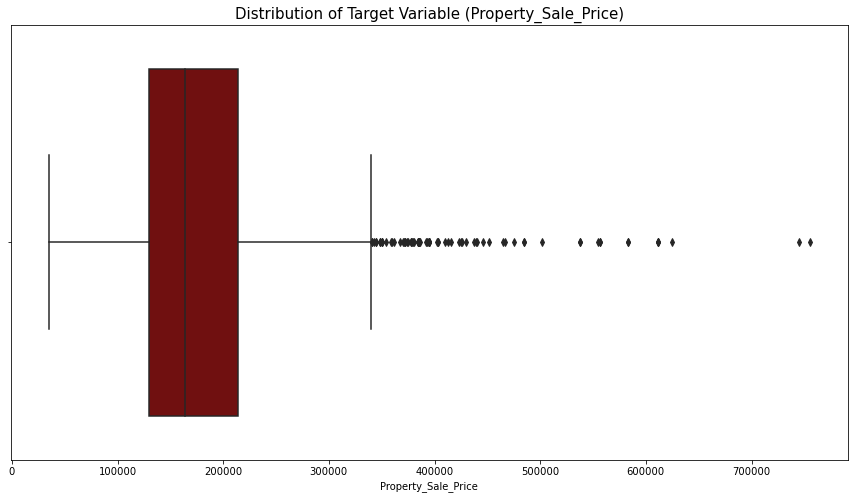

In [19]:
sns.boxplot(df_property['Property_Sale_Price'], color='maroon')


plt.title('Distribution of Target Variable (Property_Sale_Price)', fontsize = 15)

plt.show()

From the above plot we can see that there are outliers present in the target variable 'Property_Sale_Price'. Outliers badly affect the prediction of the regression model and thus, we will remove these outliers.

In [50]:

df_property = df_property[df_property['Property_Sale_Price'] < 500000]


df_property.shape

(2059, 78)

<a id='Missing_Values'></a>
### 4.1.5 Missing Values

If we do not handle the missing values properly then we may end up drawing an inaccurate inference about the data.

**Look for the missing values**

In [52]:

total_nulls = df_property.isnull().sum().sort_values(ascending = False)          

percent_null = (df_property.isnull().sum()*100/df_property.isnull().count())  
percent_null = percent_null.sort_values(ascending = False) 


missing_values = pd.concat([total_nulls, percent_null], axis = 1, keys = ['Total Nulls', 'Percentage of Missing Values'])    


missing_values['Data Type'] = df_property[missing_values.index].dtypes
missing_values

,Total Nulls,Percentage of Missing Values,Data Type
MiscFeature,1979,96.114619,object
Alley,1930,93.734823,object
Fence,1656,80.427392,object
FireplaceQu,988,47.984458,object
LotFrontage,320,15.541525,float64
GarageType,113,5.488101,object
GarageFinish,113,5.488101,object
GarageQual,113,5.488101,object
GarageCond,113,5.488101,object
GarageYrBlt,113,5.488101,float64


**Handle the missing values for numerical variables**

In [53]:

num_missing_values = missing_values[(missing_values['Total Nulls'] > 0) & (missing_values['Data Type'] != 'object')]
num_missing_values

,Total Nulls,Percentage of Missing Values,Data Type
LotFrontage,320,15.541525,float64
GarageYrBlt,113,5.488101,float64
MasVnrArea,14,0.679942,float64


For the numerical variables, we can replace the missing values by their mean, median or mode as per the requirement.

#### The variable 'LotFrontage' is right skewed and thus we will fill the missing values with its median value

In [56]:

df_property['LotFrontage'] = df_property['LotFrontage'].fillna(df_property['LotFrontage'].median())

In [55]:
print(df_property.LotFrontage.mean())
print(df_property.LotFrontage.median())

71.87291546866015
70.0


#### We will replace the missing values in the numeric variable `GarageYrBlt` by 0. The missing values in this variable indicates that there are 81 observations for which garage facility is not available.

In [57]:

df_property['GarageYrBlt'] = df_property['GarageYrBlt'].fillna(0)

#### The variable 'MasVnrArea' is positively skewed and thus we will fill the missing values with its median value

In [92]:
print(df_property.MasVnrArea.mean())
print(df_property.MasVnrArea.median())

98.44834307992203
0.0


In [63]:
df_property.shape[0]

78

In [64]:
df_property.shape[0] - sum(df_property.MasVnrArea > 0.0)


1242

In [70]:
df_property.groupby(['Dwell_Type'])['MasVnrArea'].median()

Dwell_Type
20        0.0
30        0.0
40        0.0
45        0.0
50        0.0
60       75.5
70        0.0
75        0.0
80       43.5
85        0.0
90        0.0
120      66.0
150      28.0
160      42.0
180       0.0
190       0.0
303     640.0
7080      0.0
Name: MasVnrArea, dtype: float64

In [83]:
df_property.loc[df_property.Dwell_Type == 60, 'MasVnrArea'].count()

418

In [88]:

df_property.loc[df_property.Dwell_Type == 120, 'MasVnrArea'] = df_property.loc[df_property.Dwell_Type == 120, 'MasVnrArea'].fillna(df_property.loc[df_property.Dwell_Type == 120,'MasVnrArea'].median())

In [93]:

df_property['MasVnrArea'] = df_property['MasVnrArea'].fillna(df_property['MasVnrArea'].median())

In [94]:
df1 = df_property[df_property['MasVnrArea'].isnull()]

In [95]:
df1

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price


In [97]:
df1.groupby('Dwell_Type').count()

,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
Dwell_Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


**Handle the missing values for categorical variables**

In [26]:

cat_missing_values = missing_values[(missing_values['Total Nulls'] > 0) & (missing_values['Data Type'] == 'object')]
cat_missing_values

,Total Nulls,Percentage of Missing Values,Data Type
MiscFeature,1979,96.114619,object
Alley,1930,93.734823,object
Fence,1656,80.427392,object
FireplaceQu,988,47.984458,object
GarageCond,113,5.488101,object
GarageType,113,5.488101,object
GarageFinish,113,5.488101,object
GarageQual,113,5.488101,object
BsmtExposure,61,2.962603,object
BsmtFinType2,60,2.914036,object


In [98]:

df_property['MiscFeature'] = df_property['MiscFeature'].fillna('None')


df_property['Alley'] = df_property['Alley'].fillna('No alley access')


df_property['Fence'] = df_property['Fence'].fillna('No Fence')


df_property['FireplaceQu'] = df_property['FireplaceQu'].fillna('No Fireplace')

In [99]:

for col in ['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual']:
    df_property[col].fillna('No Garage', inplace = True)

In [100]:

for col in ['BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond','BsmtFinType1']:
    df_property[col].fillna('No Basement', inplace = True)

In [101]:

df_property['MasVnrType'] = df_property['MasVnrType'].fillna('None')

In [103]:
mode_electrical = df_property['Electrical'].mode()
mode_electrical

0    SBrkr
dtype: object

In [104]:

mode_electrical = df_property['Electrical'].mode()
df_property['Electrical'].fillna(mode_electrical[0] , inplace = True)

<a id='correlation'></a>
### 4.1.6 Study correlation

**Compute a correlation matrix**

In [32]:

corrmat = df_property.corr()


corrmat

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price
LotFrontage,1.000000,0.238191,0.081517,0.092211,0.111412,0.118122,0.055937,0.105129,0.256237,0.318458,0.054620,0.024525,0.284689,0.078472,-0.036578,0.153532,0.036507,0.207026,0.009171,0.264457,0.193244,0.081887,0.216162,0.248652,0.073232,0.092217,0.000492,0.037425,0.018689,-0.003469,0.028949,0.024222,0.259284
LotArea,0.238191,1.000000,-0.017109,0.013312,0.041665,0.157255,0.077684,-0.000161,0.193753,0.239459,0.023070,-0.000437,0.196624,0.123539,0.031117,0.085524,-0.002532,0.103089,-0.007048,0.143813,0.208337,0.064729,0.120713,0.137110,0.112262,0.063370,-0.021205,0.011367,0.027271,0.031767,0.000059,-0.008380,0.201837
YearBuilt,0.081517,-0.017109,1.000000,0.534846,0.258605,0.200397,-0.027750,0.117984,0.322489,0.225896,0.011759,-0.180594,0.158950,0.139671,-0.018345,0.398912,0.191748,-0.057029,-0.143052,0.069192,0.127941,0.219338,0.453642,0.404166,0.182813,0.178019,-0.321816,0.034844,-0.050894,-0.038275,0.031601,-0.007701,0.456523
YearRemodAdd,0.092211,0.013312,0.534846,1.000000,0.153766,0.092169,-0.074160,0.197311,0.275945,0.214706,0.133300,-0.084622,0.265337,0.099852,-0.011554,0.419381,0.176598,-0.038715,-0.127357,0.161845,0.099378,0.111173,0.387912,0.329864,0.182945,0.218917,-0.176180,0.040749,-0.044323,-0.011217,0.038320,0.055504,0.497005
MasVnrArea,0.111412,0.041665,0.258605,0.153766,1.000000,0.203449,-0.077174,0.128413,0.317306,0.289921,0.175364,-0.071076,0.358569,0.065543,0.020719,0.257621,0.192465,0.103158,-0.052282,0.244016,0.263473,0.131745,0.340641,0.342405,0.113509,0.136036,-0.094168,0.033596,0.054797,-0.034648,-0.006236,0.011242,0.438844
BsmtFinSF1,0.118122,0.157255,0.200397,0.092169,0.203449,1.000000,-0.063139,-0.514643,0.468375,0.377574,-0.144388,-0.071639,0.146652,0.641491,0.080676,0.022725,0.003940,-0.129599,-0.089633,-0.022325,0.202566,0.093347,0.179226,0.244935,0.208102,0.108858,-0.086769,0.047758,0.042606,-0.000288,-0.011921,0.019093,0.342365
BsmtFinSF2,0.055937,0.077684,-0.027750,-0.074160,-0.077174,-0.063139,1.000000,-0.207872,0.106746,0.095781,-0.115530,-0.003752,-0.029608,0.170270,0.068032,-0.093610,-0.044307,-0.017684,-0.043336,-0.048209,0.039138,0.046382,-0.042634,-0.019151,0.076978,-0.001180,0.058115,-0.030464,0.098692,-0.002251,-0.016672,0.025224,-0.028908
BsmtUnfSF,0.105129,-0.000161,0.117984,0.197311,0.128413,-0.514643,-0.207872,1.000000,0.444357,0.329430,-0.002545,0.032617,0.244148,-0.412720,-0.111400,0.291071,-0.046310,0.154499,0.014057,0.247856,0.077578,0.045420,0.225198,0.197519,-0.005751,0.141691,-0.010603,0.009747,-0.013646,-0.019743,0.044928,-0.048135,0.243283
TotalBsmtSF,0.256237,0.193753,0.322489,0.275945,0.317306,0.468375,0.106746,0.444357,1.000000,0.779426,-0.198123,-0.041315,0.399745,0.295662,-0.007614,0.295603,-0.062438,0.022277,-0.095253,0.220785,0.308159,0.163401,0.408374,0.456518,0.240381,0.262956,-0.078579,0.047997,0.068569,-0.022127,0.028723,-0.021312,0.602471
1stFlrSF,0.318458,0.239459,0.225896,0.214706,0.289921,0.377574,0.095781,0.329430,0.779426,1.000000,-0.240017,-0.020983,0.528308,0.222190,-0.010812,0.354512,-0.153219,0.113136,0.068935,0.372284,0.381998,0.163309,0.419084,0.462783,0.240294,0.216539,-0.049631,0.064372,0.074862,-0.027565,0.048724,-0.003292,0.581605


**2. Plot the heatmap for the diagonal correlation matrix**

A correlation matrix is a symmetric matrix. Plot only the upper triangular entries using a heatmap.

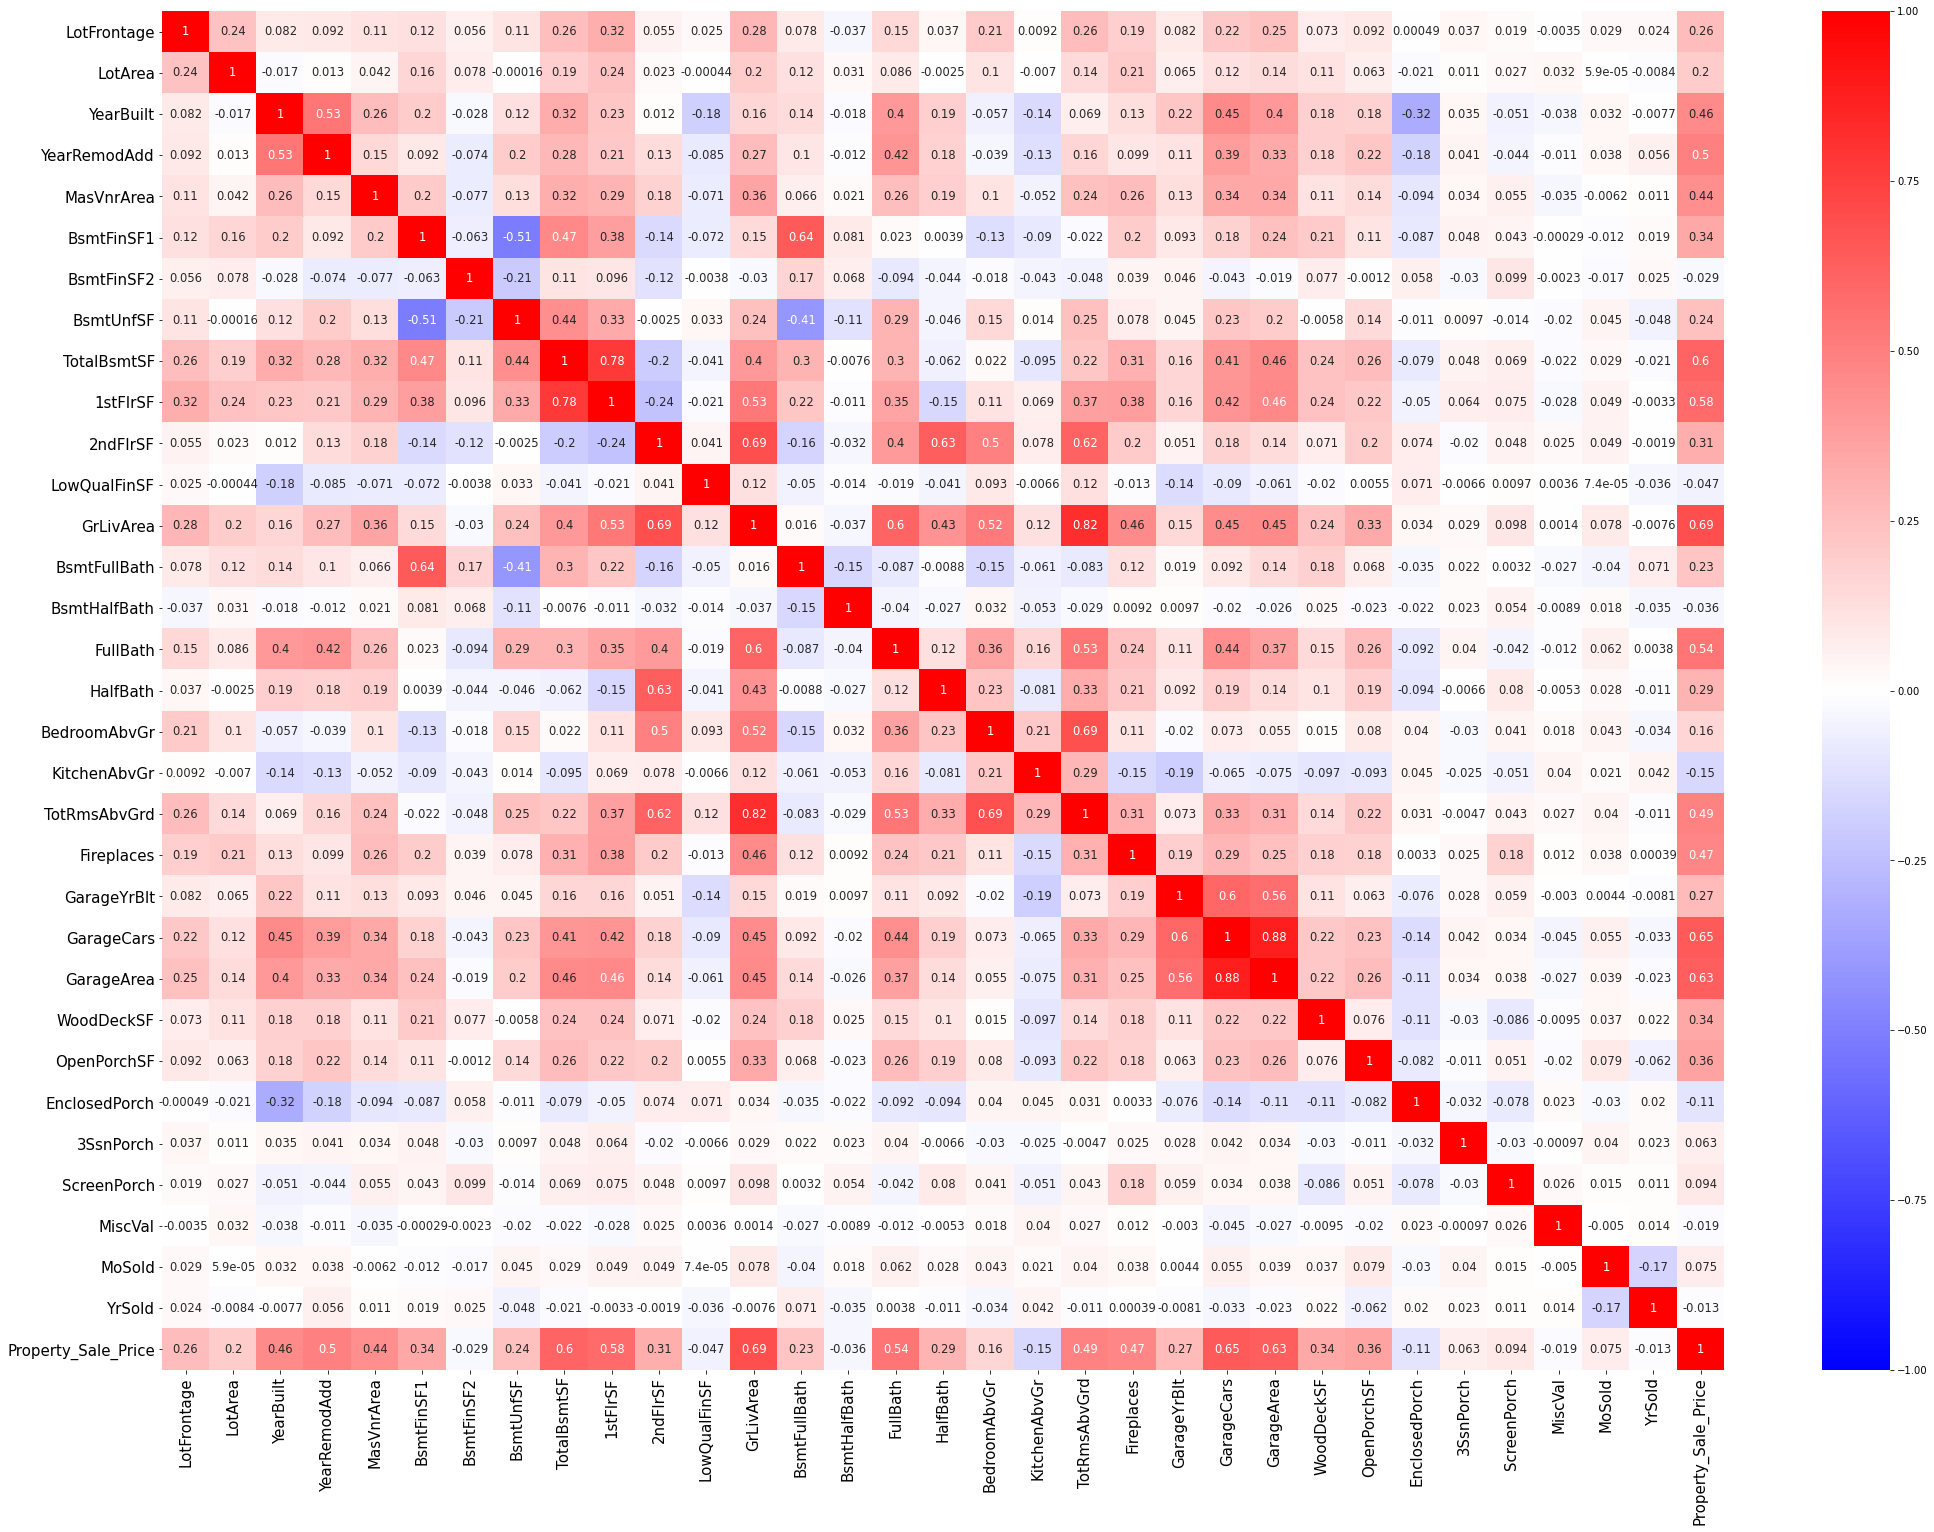

In [33]:

plt.figure(figsize = (35,25))


sns.heatmap(corrmat, annot = True, vmax = 1.0, vmin = -1.0, cmap = 'bwr', annot_kws = {"size": 11.5})


plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


plt.show()

<a id='cat_num'></a>
### 4.1.7 Analyze Relationships Between Target and Categorical Variables

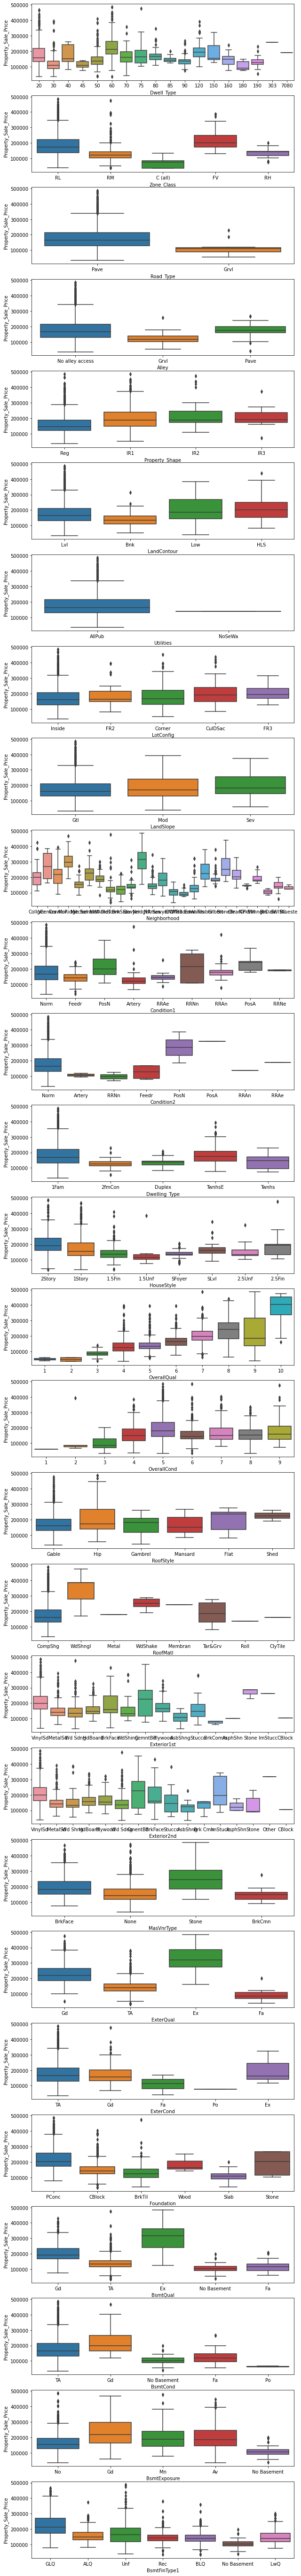

In [111]:

categorical=[]


for column in df_property:

    if is_string_dtype(df_property[column]):
        

        categorical.append(column)


fig, ax = plt.subplots(nrows = 28, ncols = 1, figsize = (10, 100))


for variable, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x = variable, y = 'Property_Sale_Price', data = df_property, ax = subplot)
    

plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be seen that most of the categorical variables have an effect on the sale price of the property. The median sale price rises exponentially with respect to the rating of the overall quality of the material used.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='Data_Preparation'></a>
## 4.2 Data Preparation

<a id='Normality'></a>
### 4.2.1 Check for Normality

**Plot a histogram and also perform the Shapiro-Wilk test**

We use the function `hist()` from the matplotlib library to plot a histogram.

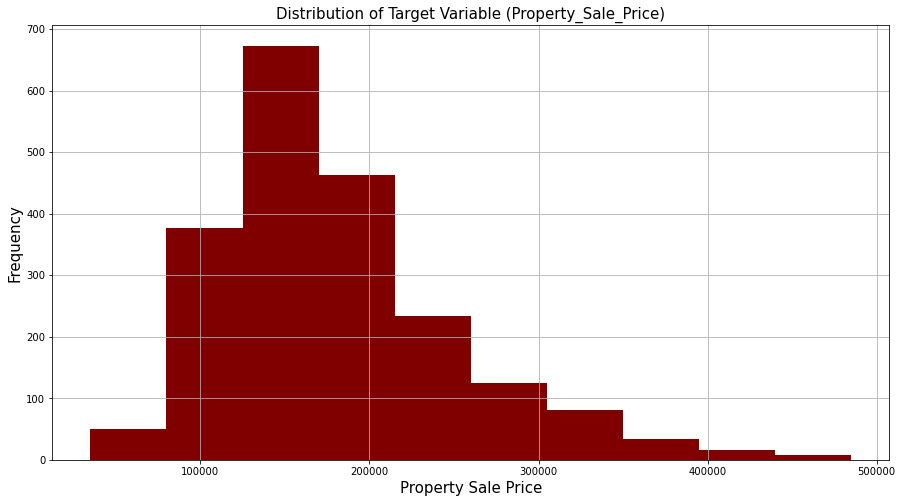

In [35]:

df_property.Property_Sale_Price.hist(color = 'maroon')


plt.title('Distribution of Target Variable (Property_Sale_Price)', fontsize = 15)
plt.xlabel('Property Sale Price', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)


plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We can see that the variable 'Property_Sale_Price' is positively skewed and thus we can say that it is not normally distributed.</b>
                </font>
            </div>
        </td>
    </tr>
</table>




<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We should not only make conclusions through visual representations or only using a statistical test but perform multiple ways to get the best insights.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us perform from Shapiro-Wilk test to check the normality of the target variable.

The null and alternate hypothesis of Shapiro-Wilk test is as follows: <br>

<p style='text-indent:25em'> <strong> H<sub>o</sub>: The data is normally distributed</strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>: The data is not normally distributed</strong> </p>

In [36]:

stat, p = shapiro(df_property.Property_Sale_Price)


print('Statistics=%.3f, p-value=%.3f' % (stat, p))


alpha = 0.05


if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.926, p-value=0.000
The data is not normally distributed (reject H0)


In [37]:

df_property['log_Property_Sale_Price'] = np.log(df_property['Property_Sale_Price'])


df_property.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,log_Property_Sale_Price
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,No Fence,None,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,No Fence,None,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,No Fence,None,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,No Fence,None,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,No Fence,None,0,12,2008,WD,Normal,250000,12.429216


**Recheck for normality by plotting histogram and performing Shapiro-Wilk test**

Let us first plot a histogram of `log_Property_Sale_Price`.

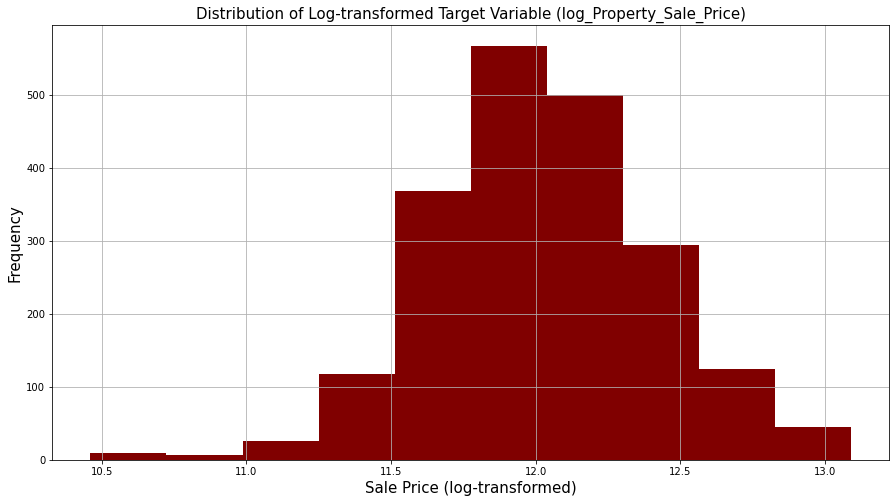

In [38]:

df_property.log_Property_Sale_Price.hist(color = 'maroon')


plt.title('Distribution of Log-transformed Target Variable (log_Property_Sale_Price)', fontsize = 15)
plt.xlabel('Sale Price (log-transformed)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)


plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be seen that the variable log_Property_Sale_Price is near normally distributed. Lets confirm it again by using the Shapiro-Wilk test.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us perform Shapiro-Wilk test.

In [39]:

stat, p = shapiro(df_property['log_Property_Sale_Price'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))


alpha = 0.05


if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.991, p-value=0.000
The data is not normally distributed (reject H0)


In [40]:

df_property['log_Property_Sale_Price'].skew()

-0.10293032838737998

<a id='dummy'></a>
### 4.2.2 Dummy Encode the Categorical Variables

**Filter numerical and categorical variables**

In [41]:

df_numeric_features = df_property.select_dtypes(include=np.number)


df_numeric_features.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price', 'log_Property_Sale_Price'],
      dtype='object')

In [42]:
df_categoric_features = df_property.select_dtypes(include = object)


df_categoric_features.columns

Index(['Dwell_Type', 'Zone_Class', 'Road_Type', 'Alley', 'Property_Shape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

**Dummy encode the catergorical variables**

**Concatenate numerical and dummy encoded categorical variables**

In [44]:

df_property_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)


df_property_dummy.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No alley access,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,Garage

In [45]:
df_property_dummy.shape

(2059, 288)

<a id='LinearRegression'></a>
# 5. Linear Regression (OLS)

<a id='withLog'></a>
## 5.1 Multiple Linear Regression Full Model with Log Transformed Dependent Variable (OLS)

#### Follow the steps in order to build the OLS model:

**1. Split the data into training and test sets**

As the OLS function does not include the intercept term by default. Thus, we add the intercept column to the dataset.

In [46]:

df_property_dummy = sm.add_constant(df_property_dummy)


X = df_property_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)


y = df_property_dummy[['Property_Sale_Price','log_Property_Sale_Price']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


print("The shape of X_train is:",X_train.shape)


print("The shape of X_test is:",X_test.shape)


print("The shape of y_train is:",y_train.shape)


print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1441, 287)
The shape of X_test is: (618, 287)
The shape of y_train is: (1441, 2)
The shape of y_test is: (618, 2)


**2. Build model using sm.OLS().fit()**

In [47]:

linreg_logmodel_full = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()

print(linreg_logmodel_full.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.942
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                     71.93
Date:                     Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                             20:05:55   Log-Likelihood:                 1377.6
No. Observations:                     1441   AIC:                            -2221.
Df Residuals:                         1174   BIC:                            -813.4
Df Model:                              266                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains around 94% of the variation in dependent variable log_Property_Sale_Price. The Condition Number 1.05e+19 suggests that there is severe multicollinearity in the data. The Durbin-Watson test statistics is 1.885 i.e. close to 2.0 and thus it indicates that there is no autocorrelation. </b>
                </font>
            </div>
        </td>
    </tr>
</table>


**3. Predict the values using test set**

In [48]:

linreg_logmodel_full_predictions = linreg_logmodel_full.predict(X_test)

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Note that the predicted values are log transformed Property_Sale_Price. In order to get Property_Sale_Price values, we take the antilog of these predicted values by using the function np.exp()</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [49]:

predicted_Property_Sale_Price = np.exp(linreg_logmodel_full_predictions)


actual_Property_Sale_Price = y_test['Property_Sale_Price']

**4. Compute accuracy measures**



In [50]:

linreg_logmodel_full_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)


linreg_logmodel_full_rsquared = linreg_logmodel_full.rsquared

linreg_logmodel_full_rsquared_adj = linreg_logmodel_full.rsquared_adj 

**5. Tabulate the results**

In [51]:

cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']


result_tabulation = pd.DataFrame(columns = cols)

linreg_logmodel_full_metrics = pd.Series({'Model': "Linreg full model with log of target variable ",
                     'RMSE':linreg_logmodel_full_rmse,
                     'R-Squared': linreg_logmodel_full_rsquared,
                     'Adj. R-Squared': linreg_logmodel_full_rsquared_adj     
                   })


result_tabulation = result_tabulation.append(linreg_logmodel_full_metrics, ignore_index = True)


result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,26703.095144,0.942188,0.929089


<a id='withoutLog'></a>
## 5.2 Multiple Linear Regression Full Model without Log Transformed Target Variable (OLS)

**1. Build model using sm.OLS().fit()**

In [52]:

linreg_nolog_model = sm.OLS(y_train['Property_Sale_Price'], X_train).fit()


print(linreg_nolog_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.942
Model:                             OLS   Adj. R-squared:                  0.929
Method:                  Least Squares   F-statistic:                     72.15
Date:                 Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                         20:05:55   Log-Likelihood:                -16075.
No. Observations:                 1441   AIC:                         3.268e+04
Df Residuals:                     1174   BIC:                         3.409e+04
Df Model:                          266                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains around 94% of the variation in dependent variable Property_Sale_Price. The Durbin-Watson test statistics is 1.868 and indicates that there is no autocorrelation. The Condition Number 1.05e+19 suggests that there is severe multicollinearity in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**2. Predict the values using test set**

In [53]:

linreg_nolog_model_predictions = linreg_nolog_model.predict(X_test)

**3. Compute accuracy measures**

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [54]:

linreg_nolog_model_rmse = rmse(actual_Property_Sale_Price, linreg_nolog_model_predictions)
linreg_nolog_model_rsquared = linreg_nolog_model.rsquared


linreg_nolog_model_rsquared_adj = linreg_nolog_model.rsquared_adj 

**4. Tabulate the results**

In [55]:

linreg_nolog_model_metrics = pd.Series({'Model': "Linreg full model without log of target variable ",
                                                 'RMSE':linreg_nolog_model_rmse,
                                                 'R-Squared': linreg_nolog_model_rsquared,
                                                 'Adj. R-Squared': linreg_nolog_model_rsquared_adj})


result_tabulation = result_tabulation.append(linreg_nolog_model_metrics, ignore_index = True)


result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,26703.095144,0.942188,0.929089
1,Linreg full model without log of target variable,36250.935016,0.942355,0.929294


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>If we compare the results in the table we can see that the linreg model withh log of target variable is performing slightly better than the model without log of target variable. Thus we will continue with the target variable 'log_Property_Sale_Price'.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Feature_Engineering'></a>
## 5.3 Feature Engineering

It is the process of creating new features using domain knowledge of the data that provides more insight into the data. Let us create a few features from the existing dataset and build a regression model on the newly created data.

<a id='feature1'></a>
### 5.3.1 Multiple Linear Regression (Using New Feature) - 1

#### In order to build the model, we do the following:

**1. Create a new feature by using variables 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', and 'GrLivArea'.**

**Calculate the complete area of the house.**<br>
Create a new variable `TotalSF` representing the total square feet area of the house by adding the area of the first floor, second floor, ground level and basement of the house.

In [56]:

df_property['TotalSF'] = df_property['TotalBsmtSF'] + df_property['1stFlrSF'] + df_property['2ndFlrSF'] + df_property['GrLivArea']


df_property = df_property.drop(["TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea"], axis=1)

In [57]:

df_numeric_features = df_property.select_dtypes(include=np.number)


df_categoric_features = df_property.select_dtypes(include = object)

**Dummy encode the catergorical variables**

In [58]:

dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

**Concatenate numerical and dummy encoded categorical variables**

In [59]:

df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)


df_dummy.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price,TotalSF,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No alley access,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,

**2. Split the data into train and test sets**

In [60]:

df_dummy = sm.add_constant(df_dummy)

X = df_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)


y = df_dummy[['Property_Sale_Price','log_Property_Sale_Price']]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


print("The shape of X_train is:",X_train.shape)


print("The shape of X_test is:",X_test.shape)

print("The shape of y_train is:",y_train.shape)


print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1441, 284)
The shape of X_test is: (618, 284)
The shape of y_train is: (1441, 2)
The shape of y_test is: (618, 2)


**3. Build model using sm.OLS().fit()**

In [61]:

linreg_feature_1_model = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()


print(linreg_feature_1_model.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.942
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                     72.26
Date:                     Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                             20:05:56   Log-Likelihood:                 1377.6
No. Observations:                     1441   AIC:                            -2223.
Df Residuals:                         1175   BIC:                            -820.6
Df Model:                              265                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains around 94% of the variation in dependent variable log_Property_Sale_Price. The Condition Number 8.29e+18 suggests that there is severe multicollinearity in the data. The Durbin-Watson test statistics is 1.885 i.e. close to 2.0 and thus it indicates that there is no autocorrelation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**4. Predict the values using test set**

In [62]:

linreg_feature_1_model_predictions = linreg_feature_1_model.predict(X_test)

In [63]:

predicted_Property_Sale_Price = np.exp(linreg_feature_1_model_predictions)

actual_Property_Sale_Price = y_test['Property_Sale_Price']

**5. Compute accuracy measures**


In [64]:

linreg_feature_1_model_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

linreg_feature_1_model_rsquared = linreg_feature_1_model.rsquared


linreg_feature_1_model_rsquared_adj = linreg_feature_1_model.rsquared_adj 

**6. Tabulate the results**

In [65]:

linreg_feature_1_model_metrics = pd.Series({'Model': "Linreg with new feature (TotalSF) ",
                                                'RMSE': linreg_feature_1_model_rmse,
                                                'R-Squared': linreg_feature_1_model_rsquared,
                                                'Adj. R-Squared': linreg_feature_1_model_rsquared_adj})


result_tabulation = result_tabulation.append(linreg_feature_1_model_metrics, ignore_index = True)


result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,26703.095144,0.942188,0.929089
1,Linreg full model without log of target variable,36250.935016,0.942355,0.929294
2,Linreg with new feature (TotalSF),26707.706758,0.942187,0.929148


<a id='feature2'></a>
### 5.3.2 Multiple Linear Regression (Using New Feature) - 2

**1. Create two new feature by using variables 'Buiding_age' and 'Remodel_age'**

In [66]:

import datetime as dt


current_year = int(dt.datetime.now().year)

In [67]:

Buiding_age = current_year - df_property.YearBuilt
Remodel_age = current_year - df_property.YearRemodAdd

In [68]:

df_property['Buiding_age'] = Buiding_age
df_property['Remodel_age'] = Remodel_age

df_property = df_property.drop(['YearBuilt', 'YearRemodAdd'], axis=1)

In [69]:

df_numeric_features = df_property.select_dtypes(include=np.number)


df_categoric_features = df_property.select_dtypes(include = object)

**Dummy encode the catergorical variables**

In [70]:

dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

**Concatenate numerical and dummy encoded categorical variables**

In [71]:

df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

df_dummy.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price,TotalSF,Buiding_age,Remodel_age,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No alley access,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort

**2. Split the data into train and test sets**

In [72]:

df_dummy = sm.add_constant(df_dummy)


X = df_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)


y = df_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


print("The shape of X_train is:",X_train.shape)


print("The shape of X_test is:",X_test.shape)


print("The shape of y_train is:",y_train.shape)


print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1441, 284)
The shape of X_test is: (618, 284)
The shape of y_train is: (1441, 2)
The shape of y_test is: (618, 2)


**3. Build model using sm.OLS().fit()**

In [73]:

linreg_feature_2_model = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()


print(linreg_feature_2_model.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.942
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                     72.26
Date:                     Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                             20:05:57   Log-Likelihood:                 1377.6
No. Observations:                     1441   AIC:                            -2223.
Df Residuals:                         1175   BIC:                            -820.6
Df Model:                              265                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains around 94% of the variation in dependent variable log_Property_Sale_Price. The Condition Number 8.32e+18 suggests that there is severe multicollinearity in the data. The Durbin-Watson test statistics is 1.885 and indicates that there is no autocorrelation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**4. Predict the values using test set**

In [74]:

linreg_feature_2_model_predictions = linreg_feature_2_model.predict(X_test)

In [75]:

predicted_Property_Sale_Price = np.exp(linreg_feature_2_model_predictions)


actual_Property_Sale_Price = y_test['Property_Sale_Price']

**5. Compute accuracy measures**



In [76]:

linreg_feature_2_model_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)


linreg_feature_2_model_rsquared = linreg_feature_2_model.rsquared


linreg_feature_2_model_rsquared_adj = linreg_feature_2_model.rsquared_adj 

**6. Tabulate the results**

In [77]:

linreg_feature_2_model_metrics = pd.Series({'Model': "Linreg with new features (Building_age and Remodel_age)",
                                                'RMSE': linreg_feature_2_model_rmse,
                                                'R-Squared': linreg_feature_2_model_rsquared,
                                                'Adj. R-Squared': linreg_feature_2_model_rsquared_adj})


result_tabulation = result_tabulation.append(linreg_feature_2_model_metrics, ignore_index = True)


result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,26703.095144,0.942188,0.929089
1,Linreg full model without log of target variable,36250.935016,0.942355,0.929294
2,Linreg with new feature (TotalSF),26707.706758,0.942187,0.929148
3,Linreg with new features (Building_age and Rem...,26482.914928,0.942187,0.929148


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>RMSE of the model with new features 'Building_age' and 'Remodel_age' is increased. The value of R-squared and aadjusted R-squared is same as the previous model.  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='feature_selection'></a>
# 6. Feature Selection

In [78]:

df_property_features = df_property.drop(['Property_Sale_Price', 'log_Property_Sale_Price'], axis = 1)


df_numeric_features_vif = df_property_features.select_dtypes(include=[np.number])


df_numeric_features_vif.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,TotalSF,Buiding_age,Remodel_age
0,65.0,8450,196.0,706,0,150,0,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,2,2008,4276,17,17
1,80.0,9600,0.0,978,0,284,0,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,5,2007,3786,44,44
2,68.0,11250,162.0,486,0,434,0,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,9,2008,4492,19,18
3,60.0,9550,0.0,216,0,540,0,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,2,2006,4190,105,50
4,84.0,14260,350.0,655,0,490,0,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,12,2008,5541,20,20


#### Calculate the VIF for each numeric variable.

In [79]:

vif = pd.DataFrame()


vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]


vif["Features"] = df_numeric_features_vif.columns


vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,111.278598,TotalSF
1,85.894615,YrSold
2,85.370788,TotRmsAbvGrd
3,38.758997,GarageCars
4,33.441550,GarageYrBlt
5,31.120731,GarageArea
6,29.727825,BedroomAbvGr
7,27.957131,KitchenAbvGr
8,22.634076,FullBath
9,11.077306,BsmtUnfSF


In [80]:

for ind in range(len(df_numeric_features_vif.columns)):

    vif = pd.DataFrame()


    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

   
    vif["Features"] = df_numeric_features_vif.columns

    
    vif_more_than_10 = vif[vif['VIF_Factor'] > 10]
    
    
    if(vif_more_than_10.empty == False):
        df_sorted = vif_more_than_10.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
   
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor       Features
0     9.063193    LotFrontage
1     2.670255        LotArea
2     1.686031     MasVnrArea
3     5.690342     BsmtFinSF1
4     1.391897     BsmtFinSF2
5     4.787866      BsmtUnfSF
6     1.054616   LowQualFinSF
7     3.406804   BsmtFullBath
8     1.183127   BsmtHalfBath
9     1.786646       HalfBath
10    2.448238     Fireplaces
11    8.383654     GarageArea
12    1.789112     WoodDeckSF
13    1.755410    OpenPorchSF
14    1.296591  EnclosedPorch
15    1.026479      3SsnPorch
16    1.172603    ScreenPorch
17    1.015217        MiscVal
18    5.582170         MoSold
19    5.870088    Buiding_age
20    5.048220    Remodel_age


**1. Concatenate numerical and dummy encoded categorical variables**

In [81]:

df_dummy = pd.concat([df_numeric_features_vif, dummy_encoded_variables], axis=1)


df_dummy.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,Buiding_age,Remodel_age,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No alley access,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,Garag

**2. Split the data into train and test sets**

In [82]:

df_dummy = sm.add_constant(df_dummy)


X = df_dummy.copy()


y = df_property[['Property_Sale_Price','log_Property_Sale_Price']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


print("The shape of X_train is:",X_train.shape)


print("The shape of X_test is:",X_test.shape)


print("The shape of y_train is:",y_train.shape)


print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1441, 276)
The shape of X_test is: (618, 276)
The shape of y_train is: (1441, 2)
The shape of y_test is: (618, 2)


**3. Build model using sm.OLS().fit()**

In [83]:

linreg_vif_model = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()


print(linreg_vif_model.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.931
Model:                                 OLS   Adj. R-squared:                  0.916
Method:                      Least Squares   F-statistic:                     61.84
Date:                     Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                             20:05:58   Log-Likelihood:                 1247.3
No. Observations:                     1441   AIC:                            -1979.
Df Residuals:                         1183   BIC:                            -618.1
Df Model:                              257                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains around 93% of the variation in dependent variable log_Property_Sale_Price. The Condition Number 6.97e+18 suggests that there is severe multicollinearity in the data. The Durbin-Watson test statistics is 1.905 and indicates that there is no autocorrelation. </b>
                </font>
            </div>
        </td>
    </tr>
</table>


**4. Predict the values using test set**

In [84]:

linreg_vif_model_predictions = linreg_vif_model.predict(X_test)

In [85]:

predicted_Property_Sale_Price = np.exp(linreg_vif_model_predictions)


actual_Property_Sale_Price = y_test['Property_Sale_Price']

**5. Compute accuracy measures**



In [86]:

linreg_vif_model_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)


linreg_vif_model_rsquared = linreg_vif_model.rsquared

linreg_vif_model_rsquared_adj = linreg_vif_model.rsquared_adj 

**6. Tabulate the results**

In [87]:


linreg_vif_model_metrics = pd.Series({'Model': "Linreg with VIF",
                                                'RMSE': linreg_vif_model_rmse,
                                                'R-Squared': linreg_vif_model_rsquared,
                                                'Adj. R-Squared': linreg_vif_model_rsquared_adj})


result_tabulation = result_tabulation.append(linreg_vif_model_metrics, ignore_index = True)


result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,26703.095144,0.942188,0.929089
1,Linreg full model without log of target variable,36250.935016,0.942355,0.929294
2,Linreg with new feature (TotalSF),26707.706758,0.942187,0.929148
3,Linreg with new features (Building_age and Rem...,26482.914928,0.942187,0.929148
4,Linreg with VIF,32783.986696,0.930722,0.915671



 **From the above table we can see that the linear regression with new features has the lowest RMSE value. Thus, it can be concluded that the linear regression model with new features can be used to predict the price of the house.**
                    